In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el archivo train.csv desde la carpeta "data"
df = pd.read_csv("D:/proyectoICSPM/data/train.csv")

# Verificar las primeras filas
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
# Dimensiones del dataset
print("Forma del dataset:", df.shape)

# Tipos de datos y valores nulos
df.info()

# Estadísticas generales
df.describe()

Forma del dataset: (381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [1]:
print("Filas y columnas del dataset:", df.shape)
df.isnull().sum()


NameError: name 'df' is not defined

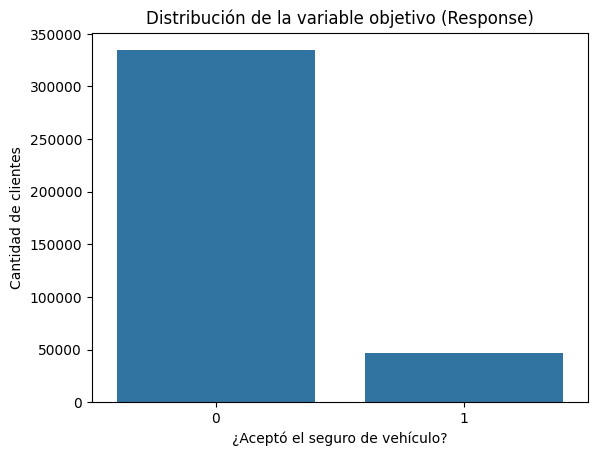

Distribución porcentual:
 Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64


In [12]:
sns.countplot(x='Response', data=df)
plt.title("Distribución de la variable objetivo (Response)")
plt.xlabel("¿Aceptó el seguro de vehículo?")
plt.ylabel("Cantidad de clientes")
plt.show()

response_rate = df['Response'].value_counts(normalize=True) * 100
print("Distribución porcentual:\n", response_rate)


In [ ]:
# Ese resultado confirma que el dataset está desequilibrado:

#El 87.7% de los clientes no acepta el seguro de vehículo.

#Solo el 12.3% sí lo acepta.

#🔍 Esto es importante para el modelo, porque un modelo ingenuo podría predecir todo como "0" y aún así tener alta precisión, pero sería inútil.

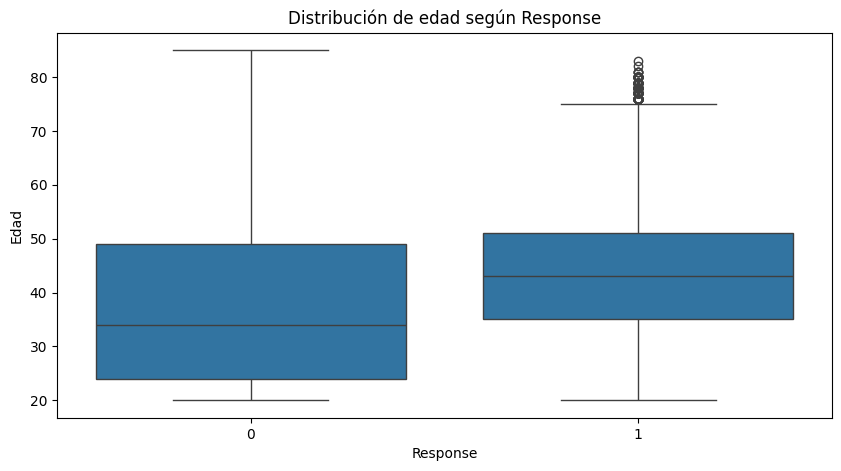

Estadístico t: -83.98779124258638
Valor p: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Distribución de edad según Response")
plt.xlabel("Response")
plt.ylabel("Edad")
plt.show()
df.groupby('Response')['Age'].describe()


In [7]:
from scipy.stats import ttest_ind

age_0 = df[df['Response'] == 0]['Age']
age_1 = df[df['Response'] == 1]['Age']

t_stat, p_value = ttest_ind(age_0, age_1, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)


Estadístico t: -83.98779124258638
Valor p: 0.0


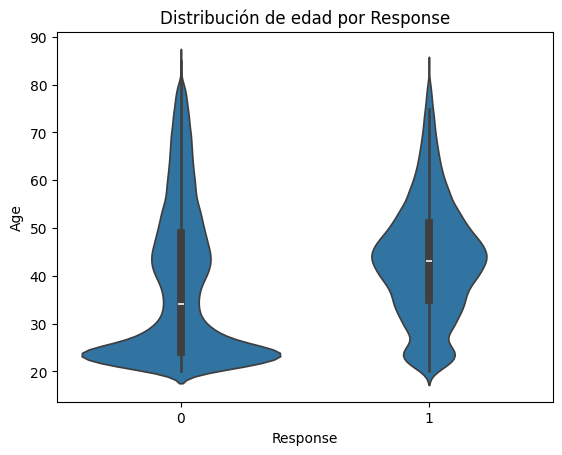

In [ ]:
sns.violinplot(x='Response', y='Age', data=df)
plt.title("Distribución de edad por Response")
plt.show()